* This notebook focuses on following tasks,
    * Create train/test dataset.
    * EDA.
    * Feature Engineering.
    * Planning next steps to create a prediction model and data analysis.

## Install Libraries

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib as plt

from pathlib import Path

## Initialize Helper Functions & Constants

In [38]:
## root directory for all data files
data_dir = Path("..", "data")
raw_data_file = Path(data_dir, "student_depression_dataset.csv")

## Read Data

In [39]:
## read data from csv file
data = pd.read_csv(raw_data_file)

In [40]:
## verify the data 
data.shape

(27901, 18)

## Quick Look

* Lets explore the data to,
    * Check for missing data.
    * Identify the column names and types.
    * Identify the targer variable. 

### Exploring Data Columns

In [41]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

* Looks like the `Depression` column is the target variable. 
* Before we confirm that lets change the column names to lower case and remove spaces for simplify management. 

#### Changing Column Names

In [42]:
column_mapping = {}

for col in data.columns:
    column_mapping[col] = "_".join(col.split(" ")).lower()

column_mapping

{'id': 'id',
 'Gender': 'gender',
 'Age': 'age',
 'City': 'city',
 'Profession': 'profession',
 'Academic Pressure': 'academic_pressure',
 'Work Pressure': 'work_pressure',
 'CGPA': 'cgpa',
 'Study Satisfaction': 'study_satisfaction',
 'Job Satisfaction': 'job_satisfaction',
 'Sleep Duration': 'sleep_duration',
 'Dietary Habits': 'dietary_habits',
 'Degree': 'degree',
 'Have you ever had suicidal thoughts ?': 'have_you_ever_had_suicidal_thoughts_?',
 'Work/Study Hours': 'work/study_hours',
 'Financial Stress': 'financial_stress',
 'Family History of Mental Illness': 'family_history_of_mental_illness',
 'Depression': 'depression'}

In [43]:
data.rename(columns={'id': 'id',
                     'Gender': 'gender',
                     'Age': 'age',
                     'City': 'city',
                     'Profession': 'profession',
                     'Academic Pressure': 'academic_pressure',
                     'Work Pressure': 'work_pressure',
                     'CGPA': 'cgpa',
                     'Study Satisfaction': 'study_satisfaction',
                     'Job Satisfaction': 'job_satisfaction',
                     'Sleep Duration': 'sleep_duration',
                     'Dietary Habits': 'dietary_habits',
                     'Degree': 'degree',
                     'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
                     'Work/Study Hours': 'work_study_hours',
                     'Financial Stress': 'financial_stress',
                     'Family History of Mental Illness': 'family_history',
                     'Depression': 'depression'}, inplace=True)

In [44]:
data.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Deleting Columns

In [45]:
## Lets delete the Id column since that won't be useful for analysis or prediction. 
data.drop(columns=["id"],inplace=True)

In [46]:
data.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history,depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Saving the Data


In [47]:
## lets save the dataset for future use.
data.to_csv(Path(data_dir,"processed_column_names.csv"),index=False)

In [48]:
data.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history,depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [49]:
## lets check for column types and missing values
data.dtypes

gender                 object
age                   float64
city                   object
profession             object
academic_pressure     float64
work_pressure         float64
cgpa                  float64
study_satisfaction    float64
job_satisfaction      float64
sleep_duration         object
dietary_habits         object
degree                 object
suicidal_thoughts      object
work_study_hours      float64
financial_stress       object
family_history         object
depression              int64
dtype: object

Observations:
* So looks like financial stress needs to be `float` but is set to object, this could be because of some missing values. 

In [50]:
## lets check for missing values
data.isnull().sum()

gender                0
age                   0
city                  0
profession            0
academic_pressure     0
work_pressure         0
cgpa                  0
study_satisfaction    0
job_satisfaction      0
sleep_duration        0
dietary_habits        0
degree                0
suicidal_thoughts     0
work_study_hours      0
financial_stress      0
family_history        0
depression            0
dtype: int64

In [51]:
data.isna().sum()

gender                0
age                   0
city                  0
profession            0
academic_pressure     0
work_pressure         0
cgpa                  0
study_satisfaction    0
job_satisfaction      0
sleep_duration        0
dietary_habits        0
degree                0
suicidal_thoughts     0
work_study_hours      0
financial_stress      0
family_history        0
depression            0
dtype: int64

In [52]:
data["financial_stress"].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

* So looks like "?" is the only non numeric character in this field

In [53]:
data["financial_stress"].value_counts()

financial_stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

In [54]:
data.loc[data["financial_stress"] == "?",["financial_stress"]] = np.nan

In [55]:
data["financial_stress"].value_counts()

financial_stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [56]:
data.dtypes

gender                 object
age                   float64
city                   object
profession             object
academic_pressure     float64
work_pressure         float64
cgpa                  float64
study_satisfaction    float64
job_satisfaction      float64
sleep_duration         object
dietary_habits         object
degree                 object
suicidal_thoughts      object
work_study_hours      float64
financial_stress       object
family_history         object
depression              int64
dtype: object

In [57]:
## converting to float
data["financial_stress"] = data["financial_stress"].astype("float64")

In [58]:
data.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,financial_stress,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


Observations:
* Most of the data is not skewed and seems to be centrally aligned.
* `work_pressure` and `job_satisfaction` `mean` and `std` values tell us that majority of the data is student data and these 2 fields are mostly zero might be safe to drop them in future. Lets explroe these two columns more. 

### Exploring work_pressure and job_satisfaction

In [59]:
data["work_pressure"].value_counts()

work_pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [60]:
## lets explore the age of students with this work pressure
data.loc[data["work_pressure"] == 5.0,["age"]]

,age
4365,38.0
25746,18.0


In [61]:
data.loc[data["work_pressure"] == 2.0,["age"]]

,age
14855,21.0


Observations:
* Based on my intuition these records do not make sense. The reason is in India students normally start working after the age of 26 27, normally after they graduate.  
* Without additional context and source of dataset its hard to conclude. 
* But since there are just 3 such records we can safely ignore it for now. 

## Visualize Distributions

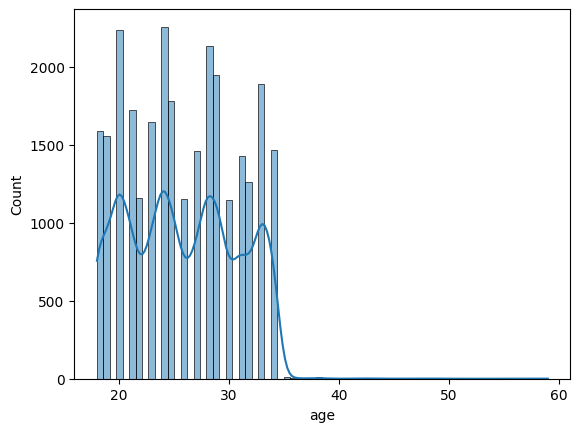

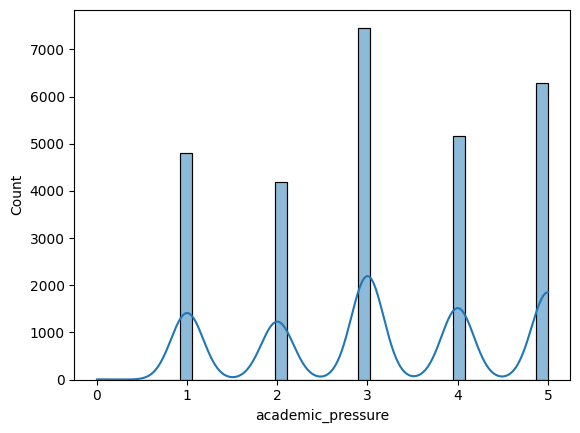

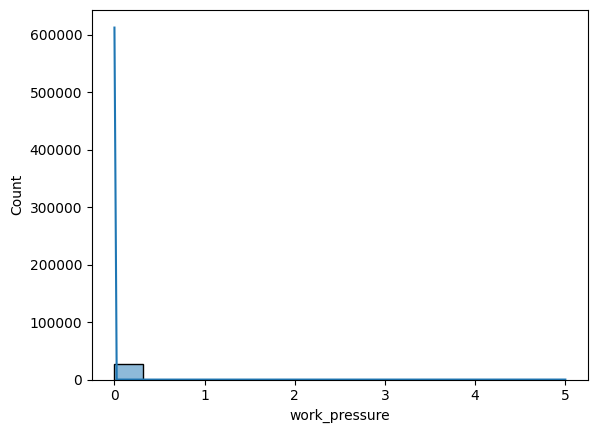

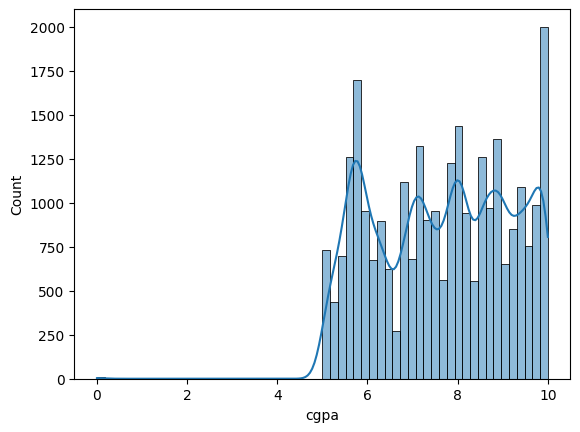

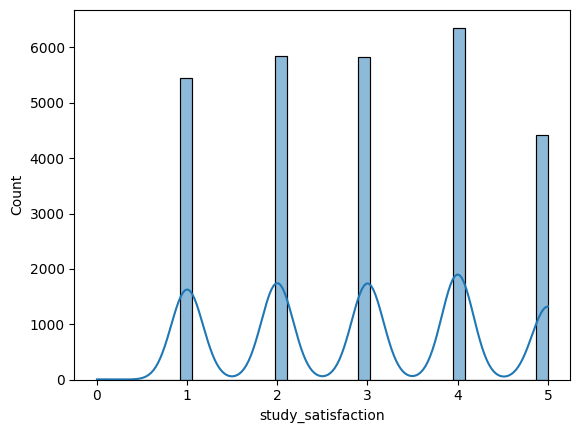

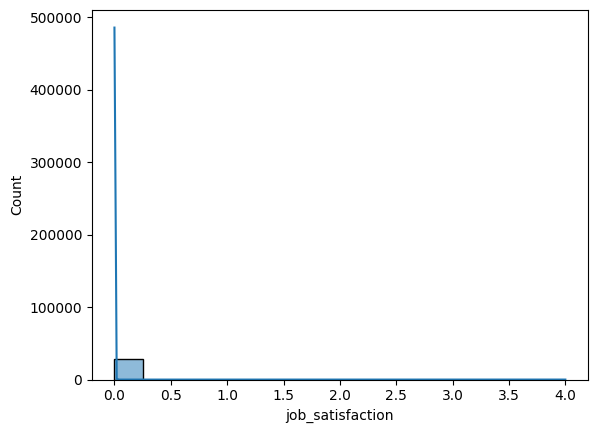

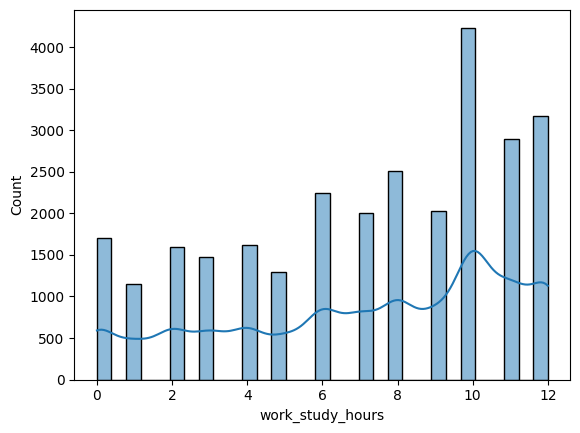

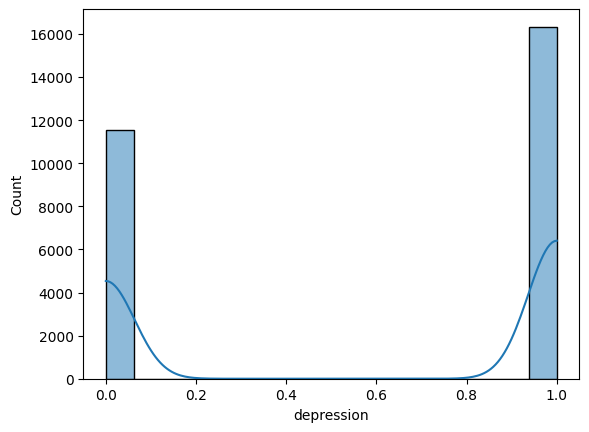

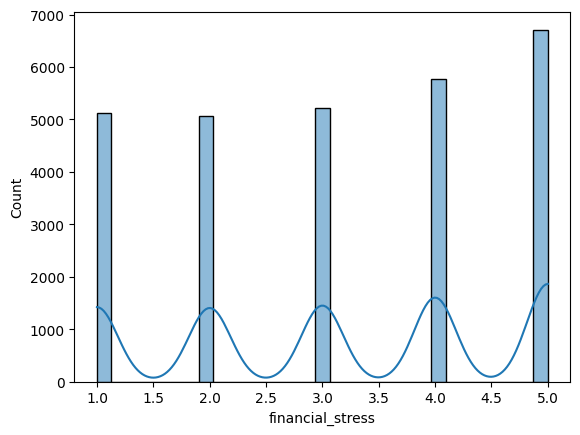

In [66]:
import seaborn as sns
import matplotlib.pyplot as pyt

columns_to_visulize = ["age", "academic_pressure", "work_pressure", "cgpa","study_satisfaction","job_satisfaction","work_study_hours", "depression", "financial_stress"]

for col in columns_to_visulize:
    pyt.figure()
    sns.histplot(data[col], kde=True)

* So the visualizations align with our understanding of dataset,
    * Negligible amout of instances have non-zero "work_pressure" and "job_satisfaction" values, indicating majority of the instances are of a student or unemployed graduates.
    * We do have considerable amout of students above the age of 30 based on this I have a hypothesis there should be an older range of students with higher financial stress and younger range of students with higher academic pressure. 
* For now next step is to do a train/test split before detailed data exploration. We do this to avoid any data snooping. 

## Train/Test Split

In [28]:
data.shape

(27901, 17)

* Lets do a stratified 80/20 train test split, this will give us ~22K training data and 5K testing data. 

In [29]:
## split the dataset into features and target
X = data.drop(columns=["depression"])
y = data["depression"]

In [30]:
X.shape,y.shape

((27901, 16), (27901,))

In [31]:
X.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No


In [32]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: depression, dtype: int64

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i,(train_index,test_index) in enumerate(sss.split(X,y)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((22320, 16), (22320,), (5581, 16), (5581,))

In [65]:
## saving the datasets to files for easier access

X_train.to_csv(Path(data_dir,"X_train.csv"), index=False)
y_train.to_csv(Path(data_dir, "y_train.csv"), index=False)
X_test.to_csv(Path(data_dir,"X_test.csv"), index=False)
y_test.to_csv(Path(data_dir, "y_test.csv"), index=False)